# <span style="color:green"><center> Lección de GeoPandas </center></span>

![](https://geopandas.org/en/stable/_images/geopandas_logo_green.png)

![](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/_images/Fotos_graduandos_2020I/Pregrado/Foto_FernandoMoreno_-_Fernando_Moreno.jpg) Mi nombre es Fernando Moreno, soy estadístico de la Universidad Nacional de Colombia y estoy cursando la Maestría en Ciencias Estadística.  

# ¿Cómo gráficar el mapa de Colombia en python?  

A continuación se describirá el proceso para graficar el mapa de Colombia usando GeoPandas:

+ instalar la librería geopandas (!pip install geopandas)
+ descargar el archivo con la geometría en formato shapefile desde [geoportal](https://geoportal.igac.gov.co/contenido/datos-abiertos-cartografia-y-geografia)
+ leer el archivo con extensión '.shp'
+ opcionalmente transformar el sistema de coordenadas con el método to_crs (con parámetros $a = 6378137.0$ metros, $1/f = 298.2572221$
entonces $e^2 = 0.006694380$ descritos en el [documento](https://www.iogp.org/wp-content/uploads/2019/09/373-07-02.pdf))
+ finalmente graficar el mapa con el comando plot

In [1]:
import geopandas as gpd

In [2]:
# https://geoportal.igac.gov.co/contenido/datos-abiertos-cartografia-y-geografia
shp = gpd.read_file('Departamentos202208_shp/Depto.shp')
shp.head()

,DeCodigo,DeNombre,DeArea,DeNorma,SHAPE_Leng,SHAPE_Area,geometry
0,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((4628086.407 1824018.057, 4628427.450..."
1,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((4624482.375 2526319.238, 4624578.119..."
2,08,Atlántico,3313.384461,Ley No. 21 de 1910,2.792774e+05,3.313384e+09,"POLYGON ((4798072.649 2784977.412, 4798080.944..."
3,13,Bolívar,26662.776537,Constitución Política de Colombia 1886,1.651842e+06,2.666278e+10,"POLYGON ((4753469.562 2752302.933, 4753478.480..."
4,15,Boyacá,23078.339852,Constitución Política de Colombia 1886,1.759339e+06,2.307834e+10,"POLYGON ((5091224.442 2337434.687, 5091324.646..."


In [3]:
shp.crs

<Derived Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
shp_4326 = shp.to_crs("EPSG:4326")
shp_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

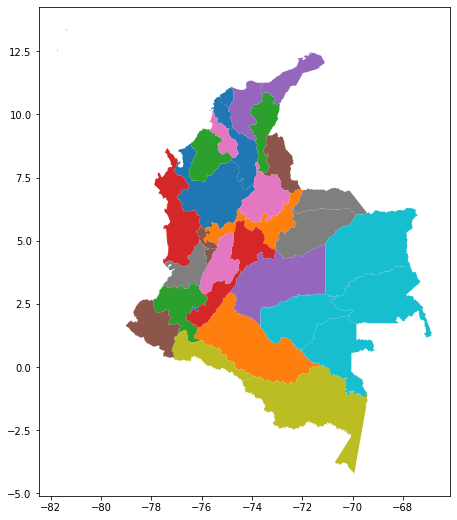

In [5]:
shp_4326.plot(column = "DeCodigo", figsize = (16, 9))